# IMPORT LIBRARIES

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 31.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import transformers
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
from torch import optim
from torch import cuda
import time
from matplotlib import pyplot as plt

In [ ]:
from transformers import BertForSequenceClassification

In [ ]:
! pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.0 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
from textblob import TextBlob

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

In [ ]:
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

%matplotlib inline

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# LOADING DATA

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving EUcentralbank_finBert.csv to EUcentralbank_finBert.csv
Saving EUinflation_finBert.csv to EUinflation_finBert.csv
Saving EUinterestrate_finBert.csv to EUinterestrate_finBert.csv
Saving EUrecession_finBert.csv to EUrecession_finBert.csv
Saving EUtax_finBert.csv to EUtax_finBert.csv
Saving macroeconomic_finBert.csv to macroeconomic_finBert.csv
Saving USFed_finBert.csv to USFed_finBert.csv
Saving USinflation_finBert.csv to USinflation_finBert.csv
Saving USinterestrate_finBert.csv to USinterestrate_finBert.csv
Saving USrecession2_finBert.csv to USrecession2_finBert.csv
Saving UStax_finBert.csv to UStax_finBert.csv


## Twitter Data

In [ ]:
tweet1 = pd.read_csv('EUcentralbank_finBert.csv')
tweet2 = pd.read_csv('EUinflation_finBert.csv')
tweet3 = pd.read_csv('EUinterestrate_finBert.csv')
tweet4 = pd.read_csv('EUrecession_finBert.csv')
tweet5 = pd.read_csv('EUtax_finBert.csv')
tweet6 = pd.read_csv('macroeconomic_finBert.csv')
tweet7 = pd.read_csv('USFed_finBert.csv')
tweet8 = pd.read_csv('USinflation_finBert.csv')
tweet9 = pd.read_csv('USinterestrate_finBert.csv')
tweet10 = pd.read_csv('USrecession2_finBert.csv')
tweet11 = pd.read_csv('UStax_finBert.csv')

In [ ]:
frames = [tweet1, tweet2, tweet3, tweet4, tweet5, tweet6, tweet7, tweet8, tweet9, tweet10, tweet11]
tweet=pd.concat(frames)

In [ ]:
# tweet = pd.read_csv('tweets.csv')
# tweet.drop(['Unnamed: 0'], axis=1, inplace = True)
tweet.head()

,Date,User,twee,sentiment
0,12/16/2013,Habus,eu central bank warns against the bitcoin comp...,neutral
1,12/20/2013,torvale1953,european central bank president mario draghi e...,neutral
2,12/22/2013,fortunepayment,the european central bank ecb has created the ...,neutral
3,12/24/2013,nipped,small panic attack by the turkish central bank...,neutral
4,12/27/2013,skydbelltreatti,details of eu iran sanctions covers oil compan...,neutral


In [ ]:
from datetime import datetime
tweet['Date'] = pd.to_datetime(tweet['Date'], errors='coerce')
tweet['Date'] = tweet['Date'].dt.strftime('%Y-%m-%d')

In [ ]:
tweet.head()

,Date,User,twee,sentiment
0,2013-12-16,Habus,eu central bank warns against the bitcoin comp...,neutral
1,2013-12-20,torvale1953,european central bank president mario draghi e...,neutral
2,2013-12-22,fortunepayment,the european central bank ecb has created the ...,neutral
3,2013-12-24,nipped,small panic attack by the turkish central bank...,neutral
4,2013-12-27,skydbelltreatti,details of eu iran sanctions covers oil compan...,neutral


In [ ]:
tweet.to_csv('twt.csv')

## Sentiment with Vader

In [ ]:
tokenizerFin = AutoTokenizer.from_pretrained("ProsusAI/finbert")

modelFin = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert",num_labels=3)
nlp = pipeline("sentiment-analysis",model=modelFin,tokenizer=tokenizerFin)

Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
 
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def analyze_sentiment_pos(tweet):
    sentiment_dict = analyzer.polarity_scores(tweet)
    return sentiment_dict['pos']

def analyze_sentiment_Neg(tweet):
    sentiment_dict = analyzer.polarity_scores(tweet)
    return sentiment_dict['neg']

def analyze_sentiment_Neu(tweet):
    sentiment_dict = analyzer.polarity_scores(tweet)
    return sentiment_dict['neu']

def analyze_sentiment_Comp(tweet):
    sentiment_dict = analyzer.polarity_scores(tweet)
    return sentiment_dict['compound']

def analyze_sentiment_BERT_int(tweet):
    sentiment_dict = nlp(tweet)
    return sentiment_dict[0]['score']

def analyze_sentiment_BERT(tweet):
    sentiment_dict = nlp(tweet)
    if sentiment_dict[0]['label']=='positive':
      return 1
    elif sentiment_dict[0]['label']=='neutral':
      return 0
    else: return -1

In [ ]:
tweet["twee"]  = tweet["twee"].astype(str) 
tweet["Vader_Comp"] = tweet['twee'].apply(analyze_sentiment_Comp)
tweet["Vader_Pos"] = tweet['twee'].apply(analyze_sentiment_pos)
tweet["Vader_Neg"] = tweet['twee'].apply(analyze_sentiment_Neg)
tweet["Vader_Neu"] = tweet['twee'].apply(analyze_sentiment_Neu)

In [ ]:
# tweet["BERT_SCORE"] = tweet['twee'].apply(analyze_sentiment_BERT_int)
# tweet["BERT_LABEL"] = tweet['twee'].apply(analyze_sentiment_BERT)

In [ ]:
# tweet['Subjectivity']= tweet['twee'].apply(getSubjectivity)
# tweet['Polarity']= tweet['twee'].apply(getPolarity)

In [ ]:
tweet.head()

,Date,User,twee,sentiment,Vader_Comp,Vader_Pos,Vader_Neg,Vader_Neu
0,2013-12-16,Habus,eu central bank warns against the bitcoin comp...,neutral,-0.6369,0.000,0.321,0.679
1,2013-12-20,torvale1953,european central bank president mario draghi e...,neutral,-0.2023,0.191,0.257,0.551
2,2013-12-22,fortunepayment,the european central bank ecb has created the ...,neutral,0.2500,0.095,0.000,0.905
3,2013-12-24,nipped,small panic attack by the turkish central bank...,neutral,-0.7506,0.000,0.218,0.782
4,2013-12-27,skydbelltreatti,details of eu iran sanctions covers oil compan...,neutral,0.0000,0.000,0.000,1.000


In [ ]:
# Drop duplicated tweets
tweet.drop_duplicates(subset='twee',inplace=True)

In [ ]:
tweet.shape

(356396, 8)

In [ ]:
# Get the day of week column
tweet['weekday']= pd.to_datetime(tweet['Date']).dt.day_name(locale='en_US.utf8')

In [ ]:
import datetime
DD = datetime.timedelta(days=1)
#filter for saturdays and Sunday date -1, -2 to become friday
#Saturdays
saturday = tweet['weekday'] == "Saturday"
tweet.loc[saturday,"Date"] = pd.to_datetime(tweet.loc[saturday,"Date"]).dt.date - DD

In [ ]:
#Sundays
DD = datetime.timedelta(days=2)

sunday = tweet['weekday'] == "Sunday"
tweet.loc[sunday,"Date"] = pd.to_datetime(tweet.loc[sunday,"Date"]).dt.date - DD

In [ ]:
tweet

,Date,User,twee,sentiment,Vader_Comp,Vader_Pos,Vader_Neg,Vader_Neu,weekday
0,2013-12-16,Habus,eu central bank warns against the bitcoin comp...,neutral,-0.6369,0.000,0.321,0.679,Monday
1,2013-12-20,torvale1953,european central bank president mario draghi e...,neutral,-0.2023,0.191,0.257,0.551,Friday
2,2013-12-20,fortunepayment,the european central bank ecb has created the ...,neutral,0.2500,0.095,0.000,0.905,Sunday
3,2013-12-24,nipped,small panic attack by the turkish central bank...,neutral,-0.7506,0.000,0.218,0.782,Tuesday
4,2013-12-27,skydbelltreatti,details of eu iran sanctions covers oil compan...,neutral,0.0000,0.000,0.000,1.000,Friday
...,...,...,...,...,...,...,...,...,...
30102,2022-11-10,thatwhatmatters,only when shri is coming to bengaluru shri ...,neutral,0.3182,0.056,0.000,0.944,Thursday
30103,2022-11-10,PhilipBritz3,psastrike the right to strike is a mature poli...,neutral,-0.7533,0.064,0.197,0.739,Thursday
30104,2022-11-10,grahamh941,bit of a long shot but does anyone have any ex...,neutral,0.6486,0.147,0.000,0.853,Thursday
30105,2022-11-10,OsgoodeIFLS,does implementing canadadisabilitybenefit act ...,negative,0.3612,0.159,0.069,0.771,Thursday


In [ ]:
tweet = tweet.set_index('Date')
tweet.head()

,User,twee,sentiment,Vader_Comp,Vader_Pos,Vader_Neg,Vader_Neu,weekday
Date,,,,,,,,
2013-12-16,Habus,eu central bank warns against the bitcoin comp...,neutral,-0.6369,0.000,0.321,0.679,Monday
2013-12-20,torvale1953,european central bank president mario draghi e...,neutral,-0.2023,0.191,0.257,0.551,Friday
2013-12-20,fortunepayment,the european central bank ecb has created the ...,neutral,0.2500,0.095,0.000,0.905,Sunday
2013-12-24,nipped,small panic attack by the turkish central bank...,neutral,-0.7506,0.000,0.218,0.782,Tuesday
2013-12-27,skydbelltreatti,details of eu iran sanctions covers oil compan...,neutral,0.0000,0.000,0.000,1.000,Friday


In [ ]:
tweet.index = pd.to_datetime(tweet.index) #convert index to datetime format before joining 2 dataframe

In [ ]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 356396 entries, 2013-12-16 to 2022-11-10
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   User        356396 non-null  object 
 1   twee        356396 non-null  object 
 2   sentiment   356396 non-null  object 
 3   Vader_Comp  356396 non-null  float64
 4   Vader_Pos   356396 non-null  float64
 5   Vader_Neg   356396 non-null  float64
 6   Vader_Neu   356396 non-null  float64
 7   weekday     356396 non-null  object 
dtypes: float64(4), object(4)
memory usage: 24.5+ MB


In [ ]:
tweets=tweet.groupby('Date').mean()

<ipython-input-37-6cbc97647edc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tweets=tweet.groupby('Date').mean()


In [ ]:
tweets

,Vader_Comp,Vader_Pos,Vader_Neg,Vader_Neu
Date,,,,
2013-12-16,-0.024960,0.083582,0.093522,0.822881
2013-12-17,-0.047185,0.067832,0.087861,0.844327
2013-12-18,0.016943,0.083365,0.078359,0.838269
2013-12-19,0.050499,0.080877,0.070027,0.849055
2013-12-20,-0.079056,0.081355,0.108529,0.810132
...,...,...,...,...
2022-11-04,-0.110068,0.089729,0.117578,0.792692
2022-11-07,-0.111497,0.089589,0.115749,0.794655
2022-11-08,-0.118162,0.087318,0.117181,0.795512


In [ ]:
# tweet_freq = tweet.groupby('BERT_LABEL').count()
# #tweet_group =tweet_freq.rename(columns={'sentiment':'sentiment','twee':'Count'})
# tweet_freq

## Getting EURUSD Price for Target

In [ ]:
dt = yf.download(tickers ='EURUSD=X', start = '2013-12-13', end='2022-11-11')
dt.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-13,1.375081,1.376842,1.371084,1.375081,1.375081,0
2013-12-16,1.373815,1.379900,1.373815,1.373928,1.373928,0
2013-12-17,1.376178,1.378210,1.372701,1.376292,1.376292,0
2013-12-18,1.377107,1.378099,1.373479,1.377126,1.377126,0
2013-12-19,1.368307,1.369394,1.365113,1.368495,1.368495,0


In [ ]:
dt['returns'] = (dt['Adj Close']/dt['Adj Close'].shift(1)) -1
dt['returnsclass'] = [1 if dt.returns[i]>0 else 0 for i in range(len(dt))]

In [ ]:
dt.dropna()

,Open,High,Low,Close,Adj Close,Volume,returns,returnsclass
Date,,,,,,,,
2013-12-16,1.373815,1.379900,1.373815,1.373928,1.373928,0,-0.000838,0
2013-12-17,1.376178,1.378210,1.372701,1.376292,1.376292,0,0.001720,1
2013-12-18,1.377107,1.378099,1.373479,1.377126,1.377126,0,0.000606,1
2013-12-19,1.368307,1.369394,1.365113,1.368495,1.368495,0,-0.006268,0
2013-12-20,1.365598,1.370870,1.362583,1.365579,1.365579,0,-0.002130,0
...,...,...,...,...,...,...,...,...
2022-11-04,0.974963,0.993818,0.974849,0.974963,0.974963,0,-0.006600,0
2022-11-07,0.992881,1.000500,0.991945,0.992881,0.992881,0,0.018378,1
2022-11-08,1.001863,1.009418,0.997606,1.001863,1.001863,0,0.009047,1


In [ ]:
dt.index = pd.to_datetime(dt.index) #convert index to datetime format before joining 2 dataframe

In [ ]:
# dt2 = dt[['returnsclass']].copy()
# dt2

## Joining tweets vader sentiment and price dataframe 

In [ ]:
df=dt.join(tweets, on='Date')

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,returns,returnsclass,Vader_Comp,Vader_Pos,Vader_Neg,Vader_Neu
Date,,,,,,,,,,,,
2013-12-13,1.375081,1.376842,1.371084,1.375081,1.375081,0,NaN,0,NaN,NaN,NaN,NaN
2013-12-16,1.373815,1.379900,1.373815,1.373928,1.373928,0,-0.000838,0,-0.024960,0.083582,0.093522,0.822881
2013-12-17,1.376178,1.378210,1.372701,1.376292,1.376292,0,0.001720,1,-0.047185,0.067832,0.087861,0.844327
2013-12-18,1.377107,1.378099,1.373479,1.377126,1.377126,0,0.000606,1,0.016943,0.083365,0.078359,0.838269
2013-12-19,1.368307,1.369394,1.365113,1.368495,1.368495,0,-0.006268,0,0.050499,0.080877,0.070027,0.849055


In [ ]:
df.drop(['Volume'], axis=1, inplace=True)

In [ ]:
df=df.dropna()

In [ ]:
s = df.pop('returnsclass')
new_df = pd.concat([df, s], 1) #move returnclass column to the last 

<ipython-input-49-b8ed0f0eba3c>:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  new_df = pd.concat([df, s], 1) #move returnclass column to the last


In [ ]:
new_df

,Open,High,Low,Close,Adj Close,returns,Vader_Comp,Vader_Pos,Vader_Neg,Vader_Neu,returnsclass
Date,,,,,,,,,,,
2013-12-16,1.373815,1.379900,1.373815,1.373928,1.373928,-0.000838,-0.024960,0.083582,0.093522,0.822881,0
2013-12-17,1.376178,1.378210,1.372701,1.376292,1.376292,0.001720,-0.047185,0.067832,0.087861,0.844327,1
2013-12-18,1.377107,1.378099,1.373479,1.377126,1.377126,0.000606,0.016943,0.083365,0.078359,0.838269,1
2013-12-19,1.368307,1.369394,1.365113,1.368495,1.368495,-0.006268,0.050499,0.080877,0.070027,0.849055,0
2013-12-20,1.365598,1.370870,1.362583,1.365579,1.365579,-0.002130,-0.079056,0.081355,0.108529,0.810132,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-04,0.974963,0.993818,0.974849,0.974963,0.974963,-0.006600,-0.110068,0.089729,0.117578,0.792692,0
2022-11-07,0.992881,1.000500,0.991945,0.992881,0.992881,0.018378,-0.111497,0.089589,0.115749,0.794655,1
2022-11-08,1.001863,1.009418,0.997606,1.001863,1.001863,0.009047,-0.118162,0.087318,0.117181,0.795512,1


In [ ]:
new_df.drop(['returns'], axis=1, inplace=True)

## Plottings

In [ ]:
dfplot=dt.join(tweets, on='Date')

In [ ]:
dfplot

,Open,High,Low,Close,Adj Close,Volume,returns,returnsclass,Vader_Comp,Vader_Pos,Vader_Neg,Vader_Neu
Date,,,,,,,,,,,,
2013-12-13,1.375081,1.376842,1.371084,1.375081,1.375081,0,NaN,0,NaN,NaN,NaN,NaN
2013-12-16,1.373815,1.379900,1.373815,1.373928,1.373928,0,-0.000838,0,-0.101289,0.054778,0.107889,0.837222
2013-12-17,1.376178,1.378210,1.372701,1.376292,1.376292,0,0.001720,1,0.049129,0.078107,0.055554,0.866304
2013-12-18,1.377107,1.378099,1.373479,1.377126,1.377126,0,0.000606,1,-0.025511,0.060947,0.074905,0.864158
2013-12-19,1.368307,1.369394,1.365113,1.368495,1.368495,0,-0.006268,0,0.030369,0.075813,0.073281,0.850906
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-07,0.992881,1.000500,0.991945,0.992881,0.992881,0,0.018378,1,-0.035709,0.080486,0.093087,0.826444
2022-11-08,1.001863,1.009418,0.997606,1.001863,1.001863,0,0.009047,1,-0.116783,0.077459,0.109368,0.813188
2022-11-09,1.008085,1.008878,1.001252,1.008085,1.008085,0,0.006210,1,-0.085911,0.077846,0.102837,0.819301


In [ ]:
dfpl = dfplot.tail(20).copy()

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
dfpl = pd.DataFrame(scaler.fit_transform(dfpl), columns=dfpl.columns, index=dfpl.index) #Scaled all columns before plotting

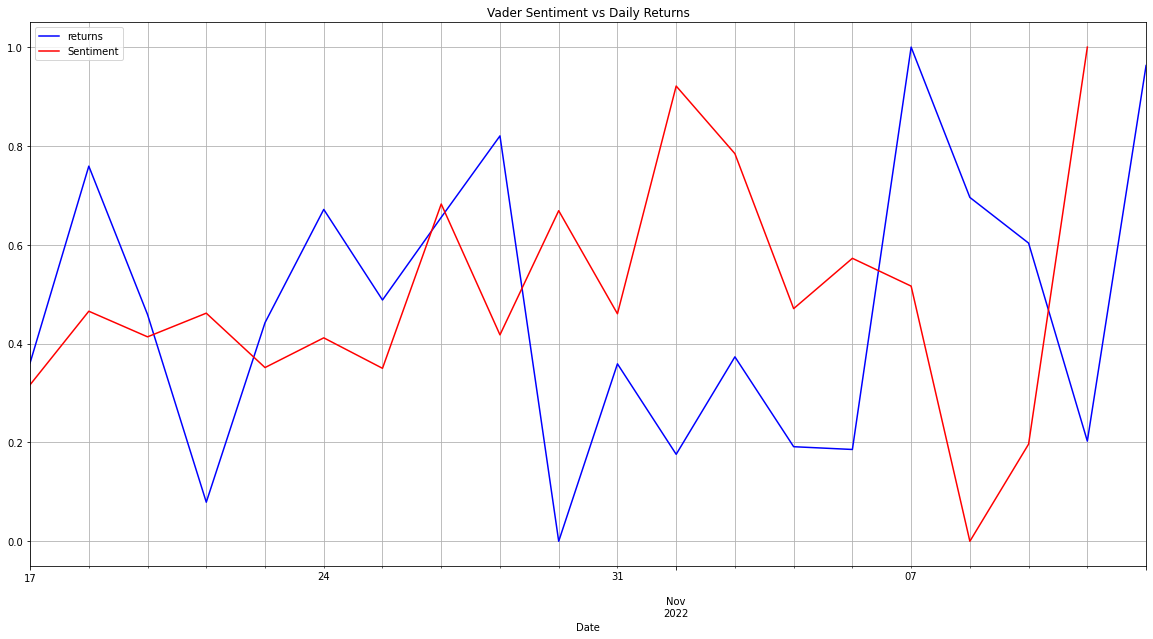

In [ ]:
dfpl['returns'].plot(figsize = (20,10), color ='b')
dfpl['Vader_Comp'].plot(label = 'Sentiment', color='r')
plt.grid(b=True, which ='both') #adding gridlines
plt.title('Vader Sentiment vs Daily Returns')
plt.legend()

# STACKED LSTM

## DATA PROCESSING

In [ ]:
# Separate the features (historical prices and technical indicators) and the target (movement)
features = new_df.iloc[:, :-1]
target = new_df['returnsclass'].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

In [ ]:
print(scaled_features.shape)
print(scaled_target.shape)

(2321, 9)
(2321, 1)


In [ ]:
# Reshape the input data for LSTM (samples, time steps, features)
lookback = 14  # Number of previous time steps to consider
num_features = 9
num_samples = scaled_features.shape[0]

In [ ]:
num_sequences = num_samples - lookback + 1
num_sequences

2308

In [ ]:
X = np.zeros((num_sequences, lookback, num_features))

for i in range(num_sequences):
    X[i] = scaled_features[i : i + lookback]
print(X.shape)

(2308, 14, 9)


In [ ]:
y = scaled_target[lookback-1:lookback-1+num_sequences]
y = np.reshape(y, (y.shape[0], 1))
print(y.shape)

(2308, 1)


In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print (X_train.shape)
print (y_train.shape)

(1846, 14, 9)
(1846, 1)


## MODEL

In [ ]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(lookback, X_train.shape[2])))
# model.add(Dropout(0.2))
# model_SA.add(LSTM(units=50, return_sequences=True))
# model_SA.add(Dropout(0.2))
model.add(LSTM(units=25))
# model_SA.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 100)           44000     
                                                                 
 lstm_1 (LSTM)               (None, 25)                12600     
                                                                 
 dense (Dense)               (None, 1)                 26        
                                                                 
Total params: 56,626
Trainable params: 56,626
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history= model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split = 0.2 )

Epoch 1/40
47/47 [==============================] - 8s 49ms/step - loss: 0.6955 - accuracy: 0.5190 - val_loss: 0.6915 - val_accuracy: 0.5216
Epoch 2/40
47/47 [==============================] - 1s 26ms/step - loss: 0.6938 - accuracy: 0.5142 - val_loss: 0.6957 - val_accuracy: 0.4784
Epoch 3/40
47/47 [==============================] - 1s 27ms/step - loss: 0.6957 - accuracy: 0.4946 - val_loss: 0.6919 - val_accuracy: 0.5216
Epoch 4/40
47/47 [==============================] - 2s 39ms/step - loss: 0.6931 - accuracy: 0.5129 - val_loss: 0.6918 - val_accuracy: 0.5216
Epoch 5/40
47/47 [==============================] - 2s 40ms/step - loss: 0.6931 - accuracy: 0.5122 - val_loss: 0.6918 - val_accuracy: 0.5297
Epoch 6/40
47/47 [==============================] - 1s 25ms/step - loss: 0.6930 - accuracy: 0.5136 - val_loss: 0.6926 - val_accuracy: 0.5216
Epoch 7/40
47/47 [==============================] - 1s 24ms/step - loss: 0.6938 - accuracy: 0.4946 - val_loss: 0.6917 - val_accuracy: 0.5216
Epoch 8/40
47

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

15/15 [==============================] - 0s 9ms/step - loss: 0.5641 - accuracy: 0.7381
Test Loss: 0.5641475915908813
Test Accuracy: 0.738095223903656


In [ ]:
predictions = model.predict(X_test)

15/15 [==============================] - 1s 7ms/step


In [ ]:
threshold = 0.5  # Threshold to convert probabilities to binary labels

incorrect_predictions = []

# Convert predicted probabilities to binary labels
binary_predictions = np.where(predictions > threshold, 1, 0)

for true_label, predicted_label in zip(y_test, binary_predictions):
    if true_label != predicted_label:
        incorrect_predictions.append((true_label, predicted_label))

incorrect_predictions_count = len(incorrect_predictions)
print(f"Number of Incorrect Predictions: {incorrect_predictions_count}")

Number of Incorrect Predictions: 121


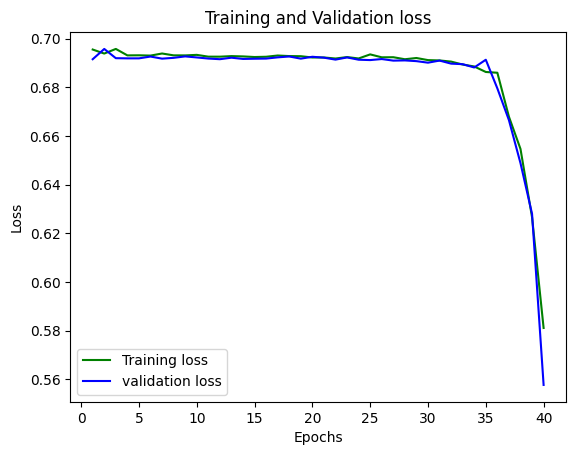

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,41)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

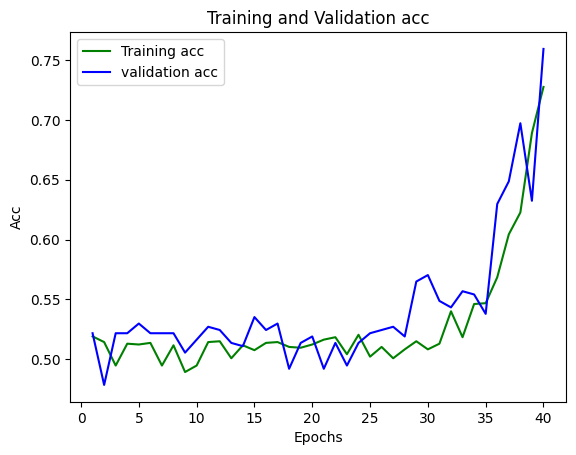

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,41)
plt.plot(epochs, acc_train, 'g', label='Training acc')
plt.plot(epochs, acc_val, 'b', label='validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert predicted probabilities to binary labels
binary_predictions = np.where(predictions > threshold, 1, 0)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, binary_predictions, digits=4))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, binary_predictions))

Classification Report:
              precision    recall  f1-score   support

         0.0     0.7126    0.8017    0.7546       232
         1.0     0.7711    0.6739    0.7193       230

    accuracy                         0.7381       462
   macro avg     0.7419    0.7378    0.7369       462
weighted avg     0.7418    0.7381    0.7370       462

Confusion Matrix:
[[186  46]
 [ 75 155]]


In [ ]:
# Prepare the input data for prediction (assuming X_test represents the most recent data available)
input_data = scaled_features[-lookback:]  # Select the most recent lookback period as input data

# Reshape the input data
input_data = np.reshape(input_data, (1, lookback, num_features))  # Adjust the shape based on your specific lookback and feature dimensions

# Make the prediction
prediction = model.predict(input_data)

# Interpret the prediction
if prediction > 0.5:
    price_movement = "Positive"
else:
    price_movement = "Negative"

# Print the predicted price movement
print("Next day's price movement:", price_movement)

1/1 [==============================] - 0s 27ms/step
Next day's price movement: Positive


# SINGLE LSTM

## Data preprocessing for LSTM

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(new_df)
print(data_set_scaled)
print(data_set_scaled[0].size)

[[0.95575293 0.95554347 0.96010293 ... 0.47806662 0.57327263 0.        ]
 [0.96120628 0.95163066 0.95755404 ... 0.5235121  0.54571744 1.        ]
 [0.96334911 0.95137574 0.95933491 ... 0.50371678 0.62522367 1.        ]
 ...
 [0.09747834 0.09815244 0.09969114 ... 0.65365144 0.4577198  1.        ]
 [0.11183391 0.09690325 0.10802951 ... 0.60325611 0.38358321 1.        ]
 [0.09768685 0.11870528 0.09093904 ... 0.38492282 0.57756151 0.        ]]
8


In [ ]:
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 14
print(data_set_scaled.shape[0])
for j in range(7):#data_set_scaled[0].size):#last column are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

2321


In [ ]:
X=np.moveaxis(X, [0], [2])

In [ ]:
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))

print(X)
print(X.shape)
print(y)
print(y.shape)

[[[0.95575293 0.95554347 0.96010293 ... 0.95580024 0.47806662 0.57327263]
  [0.96120628 0.95163066 0.95755404 ... 0.96125319 0.5235121  0.54571744]
  [0.96334911 0.95137574 0.95933491 ... 0.96317718 0.50371678 0.62522367]
  ...
  [0.97181727 0.95867527 0.96537358 ... 0.97212747 0.57022462 0.67627416]
  [0.9573214  0.9509233  0.96144159 ... 0.9571071  0.40920817 0.55072271]
  [0.96216794 0.94991302 0.93598753 ... 0.96212745 0.52107618 0.53188953]]

 [[0.96120628 0.95163066 0.95755404 ... 0.96125319 0.5235121  0.54571744]
  [0.96334911 0.95137574 0.95933491 ... 0.96317718 0.50371678 0.62522367]
  [0.94304367 0.93122927 0.94020116 ... 0.94326461 0.38161934 0.66682611]
  ...
  [0.9573214  0.9509233  0.96144159 ... 0.9571071  0.40920817 0.55072271]
  [0.96216794 0.94991302 0.93598753 ... 0.96212745 0.52107618 0.53188953]
  [0.93916045 0.92637626 0.92889675 ... 0.93903629 0.36380473 0.56119161]]

 [[0.96334911 0.95137574 0.95933491 ... 0.96317718 0.50371678 0.62522367]
  [0.94304367 0.931229

In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1845
(1845, 14, 7)
(462, 14, 7)
(1845, 1)
(462, 1)
[[0.]
 [0.]
 [1.]
 ...
 [1.]
 [1.]
 [0.]]


## LSTM Model

In [ ]:
np.random.seed(50)

lstm_input = Input(shape=(backcandles, 7), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('sigmoid', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse', metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, batch_size=32, epochs=40, shuffle=True, validation_split = 0.15)

Epoch 1/40
49/49 [==============================] - 8s 78ms/step - loss: 0.2507 - accuracy: 0.5134 - val_loss: 0.2501 - val_accuracy: 0.4765
Epoch 2/40
49/49 [==============================] - 3s 63ms/step - loss: 0.2511 - accuracy: 0.4968 - val_loss: 0.2536 - val_accuracy: 0.4693
Epoch 3/40
49/49 [==============================] - 4s 74ms/step - loss: 0.2501 - accuracy: 0.5013 - val_loss: 0.2505 - val_accuracy: 0.4657
Epoch 4/40
49/49 [==============================] - 3s 58ms/step - loss: 0.2504 - accuracy: 0.4930 - val_loss: 0.2513 - val_accuracy: 0.4693
Epoch 5/40
49/49 [==============================] - 2s 45ms/step - loss: 0.2503 - accuracy: 0.4981 - val_loss: 0.2508 - val_accuracy: 0.4693
Epoch 6/40
49/49 [==============================] - 2s 47ms/step - loss: 0.2498 - accuracy: 0.5038 - val_loss: 0.2544 - val_accuracy: 0.4693
Epoch 7/40
49/49 [==============================] - 2s 51ms/step - loss: 0.2503 - accuracy: 0.5096 - val_loss: 0.2501 - val_accuracy: 0.5126
Epoch 8/40
49

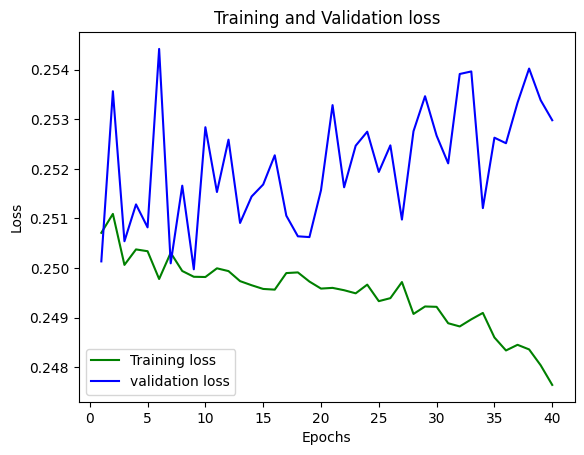

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,41)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

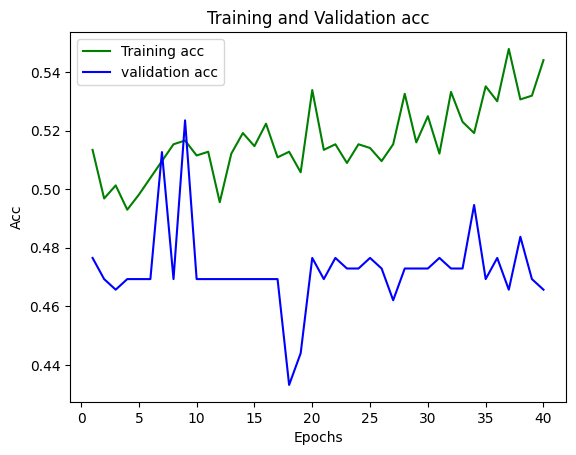

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,41)
plt.plot(epochs, acc_train, 'g', label='Training acc')
plt.plot(epochs, acc_val, 'b', label='validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred=np.where(y_pred > 0.50, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

15/15 [==============================] - 1s 17ms/step
[0] [0.]
[0] [1.]
[0] [0.]
[1] [1.]
[0] [1.]
[0] [1.]
[0] [1.]
[0] [1.]
[0] [0.]
[0] [1.]


In [ ]:
print(classification_report(y_test, y_pred, digits=4))
print(confusion_matrix(y_test, y_pred))

MNB_f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
MNB_accuracy = round((accuracy_score(y_test, y_pred)*100),2)

print("Accuracy : " , MNB_accuracy , " %")
print("f1_score : " , MNB_f1)

              precision    recall  f1-score   support

         0.0     0.5464    0.8163    0.6547       245
         1.0     0.5312    0.2350    0.3259       217

    accuracy                         0.5433       462
   macro avg     0.5388    0.5257    0.4903       462
weighted avg     0.5393    0.5433    0.5002       462

[[200  45]
 [166  51]]
Accuracy :  54.33  %
f1_score :  0.5
